In [1]:
from models import WindowObjectDetector, Windowing
from skimage.io import imread
from skimage.color import rgba2rgb
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = imread('choropleth.png')
x.shape

(5673, 1908, 4)

In [3]:
x = rgba2rgb(x)

In [4]:
x.shape

(5673, 1908, 3)

In [5]:
base_tile = 224

In [6]:
tiles = [base_tile * i for i in range(1, 1908 // 224 + 1)]

In [7]:
patches = []

x = x.reshape((1,) + x.shape)
for tile in tiles:
    window = Windowing([1, tile / 4, tile / 4, 1], [1, tile, tile, 1])
    patch = window(x)
    with tf.device('cpu'):
        patches.append(tf.identity(patch))

In [9]:
xx = patches[-1]

In [10]:
xx.shape

TensorShape([1, 13, 5, 9633792])

In [11]:
tiles[-1]

1792

In [12]:
13 * 5

65

In [13]:
5 * 224

1120

In [14]:
tiles

[224, 448, 672, 896, 1120, 1344, 1568, 1792]

In [18]:
xx.shape

TensorShape([1, 13, 5, 9633792])

In [19]:
zz = xx[0, 0, 0, ...]

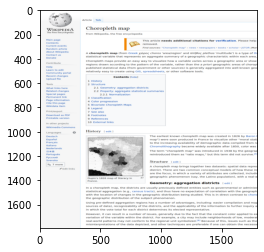

In [22]:
plt.imshow(tf.reshape(zz, (1792, 1792, 3)))

In [26]:
import numpy as np

In [31]:
def draw_patches(x):
    nrows, ncols, patchsize = x.shape[1:]
    patchwidth = int(np.sqrt(patchsize / 3))
    patches = tf.reshape(x, (nrows, ncols, patchwidth, patchwidth, 3))
    fig, ax = plt.subplots(nrows, ncols, figsize=(5, 13))
    for i in range(nrows):
        for j in range(ncols):
            ax[i, j].imshow(patches[i, j])
            ax[i, j].set_axis_off()

In [37]:
xx  =patches[0]

In [38]:
xx

<tf.Tensor: shape=(1, 101, 33, 150528), dtype=float32, numpy=
array([[[[1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ],
         [1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ],
         [1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ],
         [1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ],
         [1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ]],

        [[0.9843137 , 0.9843137 , 0.9843137 , ..., 1.        ,
          1.        , 1.        ],
         [0.8820305 , 0.8820305 , 0.8898174 , ..., 1.        ,
          1.        , 1.        ],
         [0.8677085 , 0.8677085 , 0.8754466 , ..., 1.        ,
          1.        , 1.        ],
         ...,
         [0.99215686, 0.99